In [ ]:
import scipy.stats
import pandas as pd
import matplotlib as mt
import scipy
import math
import sklearn
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
heart_dataset=pd.read_csv('/content/gdrive/MyDrive/test.csv/Emp_train.csv')



In [ ]:
heart_dataset.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#len(sample_data1)
# sample_data1.to_csv('sample1.csv')
# !cp sample1.csv "/content/gdrive/MyDrive/test.csv/"   #/content/gdrive/MyDrive/test.csv/Emp_train.csv

*DATA* SET DESCRIPTION

In [ ]:
heart_dataset.columns #column names in the dataframe

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#values in the variables
heart_dataset.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#data types of all the variables present in the dataset

heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

sample 1


In [ ]:
sample_one = pd.read_csv('/content/gdrive/MyDrive/test.csv/sample1.csv')


In [ ]:
#correlation matrix
sample_one.corr()

,Unnamed: 0,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Unnamed: 0,1.000000,1.000000,-0.007194,-0.287682,0.104898,-0.023928,-0.162328,0.054440,-0.010728,0.022159,0.084782,0.081186,0.133001,0.209859,0.202017,-0.068139
id,1.000000,1.000000,-0.007194,-0.287682,0.104898,-0.023928,-0.162328,0.054440,-0.010728,0.022159,0.084782,0.081186,0.133001,0.209859,0.202017,-0.068139
age,-0.007194,-0.007194,1.000000,-0.077405,-0.177646,0.119126,0.191655,0.310877,0.109599,0.303625,0.275020,0.168464,0.018845,-0.145734,0.052902,0.056687
education,-0.287682,-0.287682,-0.077405,1.000000,-0.026996,-0.127254,-0.089728,-0.131018,-0.204863,-0.207221,-0.211889,-0.190074,-0.232931,-0.094038,-0.119975,-0.064370
cigsPerDay,0.104898,0.104898,-0.177646,-0.026996,1.000000,-0.120967,0.111973,-0.013828,-0.053295,-0.196330,-0.090241,-0.048099,-0.196358,0.234695,0.006679,0.131303
BPMeds,-0.023928,-0.023928,0.119126,-0.127254,-0.120967,1.000000,-0.020515,0.272166,-0.046829,0.135082,0.326191,0.231909,0.035864,0.075381,-0.061773,-0.075378
prevalentStroke,-0.162328,-0.162328,0.191655,-0.089728,0.111973,-0.020515,1.000000,0.134005,-0.023057,-0.074308,0.125548,0.081340,NaN,0.000964,-0.050007,0.272166
prevalentHyp,0.054440,0.054440,0.310877,-0.131018,-0.013828,0.272166,0.134005,1.000000,0.019118,0.091622,0.784741,0.666128,0.398416,0.169057,0.140218,0.235925
diabetes,-0.010728,-0.010728,0.109599,-0.204863,-0.053295,-0.046829,-0.023057,0.019118,1.000000,0.150478,0.060518,0.154827,0.111286,0.103425,0.699574,-0.084717
totChol,0.022159,0.022159,0.303625,-0.207221,-0.196330,0.135082,-0.074308,0.091622,0.150478,1.000000,0.102522,0.138882,0.172414,-0.112624,0.149599,0.023073


Text(0.5, 1.0, 'Correlation Heatmap')

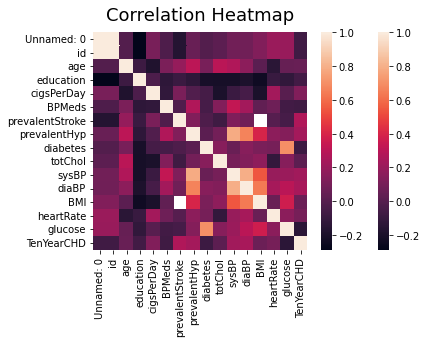

In [ ]:
#heatmap of all the data frame this gives the correlation between the vatiables
sns.heatmap(sample_one.corr())
sns.heatmap(sample_one.corr()).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

VARIABLE_1 NUMBER OF CIGARETTES PER DAY

QUESTION  1

Variable decelaration:
n = sample size
p = population proportion
q = 1-p complement of p
p_cap = sample proportion
z = test statistic

In [ ]:
n = len(sample_one)
p = len(heart_dataset[(heart_dataset['cigsPerDay']>0)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
p_cap = len(sample_one[(sample_one['cigsPerDay']>0)&(sample_one['TenYearCHD']==1)])/n
q=1-p
z=(p_cap-p)/math.sqrt(p*q/n) #test statistic

In [ ]:
print("sample size: "+str(n))
print("population proportion: "+str(p))
print("sample Proportion: "+str(p_cap))
print("Z Statistic: "+str(z))

sample size: 100
population proportion: 0.0808259587020649
sample Proportion: 0.07
Z Statistic: -0.39718428635447234


In [ ]:
P=scipy.stats.norm.sf(z)  #P (Area)
P

0.6543842155560287

Confidence Interval calculation for 95% confidence interval



In [ ]:
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap*(1-p_cap)/n)
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(p_cap-E)+"\nUpper limit: "+str(p_cap+E))

Lower limit: 0.019991184777081554
Upper limit: 0.12000881522291845


**`Variable`** declaration:
x_bar = sample mean,
Mu = population mean,
s= sample standard deviation.

In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['cigsPerDay'].mean()
x_bar = sample_one[(sample_one['TenYearCHD']==1)]['cigsPerDay'].mean()
s = sample_one[(sample_one['TenYearCHD']==1)]['cigsPerDay'].std()
t= (x_bar-Mu)/(s/math.sqrt(n))

In [ ]:
  print("Population mean: "+str(Mu))
  print("sample mean: "+str(x_bar))
  print("sample standard deviation: "+str(s))
  print("t statistic: "+str(t))

Population mean: 10.947058823529412
sample mean: 12.0
sample standard deviation: 12.713629050604066
t statistic: 0.8281987560590023


In [ ]:
t

0.8281987560590023

In [ ]:
P=scipy.stats.norm.sf(t)
P

0.20377897410167878

*Finding* confidence interval for 95% confidence

In [ ]:
t_alpha_by_2 = 1.66                     # According to t table
E = t_alpha_by_2*(s/math.sqrt(n))
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(x_bar-E)+"\nUpper limit: "+str(x_bar+E))

Lower limit: 9.889537577599725
Upper limit: 14.110462422400275


VARIABLE_2 BMI

In [ ]:
n = len(sample_one)
print("sample size: "+str(n))
p = len(heart_dataset[(heart_dataset['BMI']>26.45)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
p_cap = len(sample_one[(sample_one['BMI']>26.45)&(sample_one['TenYearCHD']==1)])/n
q=1-p
print("sample proportion: "+str(p_cap))
z=(p_cap-p)/math.sqrt(p*q/n) #test statistic
print("Z statistic: "+str(z))
print("popualation proportion: "+str(p))
P=scipy.stats.norm.sf(z)
print("Area: "+str(P))
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap*(1-p_cap)/n)
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(p_cap-E)+"\nUpper limit: "+str(p_cap+E))


sample size: 100
sample proportion: 0.07
Z statistic: 0.09755467878819886
popualation proportion: 0.06755162241887906
Area: 0.46114295693030716
Lower limit: 0.019991184777081554
Upper limit: 0.12000881522291845


In [ ]:
p_cap

0.07

In [ ]:
z=(p_cap-p)/math.sqrt(p*q/n) #test statistic
z


0.09755467878819886

In [ ]:
P=scipy.stats.norm.sf(z)
print("Area: "+str(P))

Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap*(1-p_cap)/n)
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(p_cap-E)+"\nUpper limit: "+str(p_cap+E))

Area: 0.46114295693030716
Lower limit: 0.019991184777081554
Upper limit: 0.12000881522291845


FOR MEAN

In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['BMI'].mean()
x_bar = sample_one[(sample_one['TenYearCHD']==1)]['BMI'].mean()
s = sample_one[(sample_one['TenYearCHD']==1)]['BMI'].std()

In [ ]:
print("Population mean: "+str(Mu))
print("sample mean: "+str(x_bar))
print("Standard deviation: "+str(s))
t= (x_bar-Mu)/(s/math.sqrt(n))
print("T statistic: "+str(t))
P=scipy.stats.norm.sf(t)
print("Area: "+str(P))
t_alpha_by_2 = 1.66 # According to t table
E = t_alpha_by_2*(s/math.sqrt(n))
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(x_bar-E)+"\nUpper limit: "+str(x_bar+E))

Population mean: 26.452559523809523
sample mean: 26.58272727272727
Standard deviation: 3.9076952053840914
T statistic: 0.333106197070842
Area: 0.3695270608418958
Lower limit: 25.934049868633508
Upper limit: 27.23140467682103


TOTAL COLESTROL LEVELS

In [ ]:
n = len(sample_one)
p = len(heart_dataset[(heart_dataset['totChol']>247)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
p_cap = len(sample_one[(sample_one['totChol']>247)&(sample_one['TenYearCHD']==1)])/n
q=1-p
z=(p_cap-p)/math.sqrt(p*q/n) #test statistic
P=scipy.stats.norm.sf(z)
print("Population proportion: "+str(p))
print("sample proportion: "+str(p_cap))
print("Z statistic: "+str(z))
print("Area :"+str(P))
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap*(1-p_cap)/n)
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(p_cap-E)+"\nUpper limit: "+str(p_cap+E))


Population proportion: 0.06843657817109144
sample proportion: 0.05
Z statistic: -0.7301800484747465
Area :0.7673599318316837
Lower limit: 0.007282790353301406
Upper limit: 0.0927172096466986


Confidence Interval

In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['totChol'].mean()
x_bar = sample_one[(sample_one['TenYearCHD']==1)]['totChol'].mean()
s = sample_one[(sample_one['TenYearCHD']==1)]['totChol'].std()
t= (x_bar-Mu)/(s/math.sqrt(n))
P=scipy.stats.norm.sf(t)
print("Population mean: "+str(Mu))
print("sample mean: "+str(x_bar))
print("t statistic: "+str(t))
print("Area: "+str(P))
t_alpha_by_2 = 1.66 # According to t table
E = t_alpha_by_2*(s/math.sqrt(n))
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(x_bar-E)+"\nUpper limit: "+str(x_bar+E))

Population mean: 247.21626984126985
sample mean: 246.33333333333334
t statistic: -0.21757582737253442
Area: 0.5861201898739329
Lower limit: 239.5969480424018
Upper limit: 253.06971862426488


CONFIDENCE INTERVAL

VARIABLE SYS_BP

In [ ]:
n = len(sample_one)
print("sample size: "+str(n))
p = len(heart_dataset[(heart_dataset['sysBP']>143)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
p_cap = len(sample_one[(sample_one['sysBP']>143)&(sample_one['TenYearCHD']==1)])/n
q=1-p
z=(p_cap-p)/math.sqrt(p*q/n) #test statistic
P=scipy.stats.norm.sf(z)
print("Population proportion: "+str(p))
print("sample proportion: "+str(p_cap))
print("Z statistic: "+str(z))
print("Area :"+str(P))
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap*(1-p_cap)/n)
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(p_cap-E)+"\nUpper limit: "+str(p_cap+E))

sample size: 100
Population proportion: 0.06696165191740414
sample proportion: 0.06
Z statistic: -0.27851556976796116
Area :0.6096916926308373
Lower limit: 0.013452579018811368
Upper limit: 0.10654742098118863


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['sysBP'].mean()
x_bar = sample_one[(sample_one['TenYearCHD']==1)]['sysBP'].mean()
s = sample_one[(sample_one['TenYearCHD']==1)]['sysBP'].std()
t= (x_bar-Mu)/(s/math.sqrt(n))
P=scipy.stats.norm.sf(t)
print("Population mean: "+str(Mu))
print("sample mean: "+str(x_bar))
print("t statistic: "+str(t))
print("Area: "+str(P))
t_alpha_by_2 = 1.66 # According to t table
E = t_alpha_by_2*(s/math.sqrt(n))
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(x_bar-E)+"\nUpper limit: "+str(x_bar+E))

Population mean: 143.8542074363992
sample mean: 148.375
t statistic: 2.5369256781275316
Area: 0.005591534644818699
Lower limit: 145.41688588562977
Upper limit: 151.33311411437023


VARIABLE diaBP

In [ ]:
n = len(sample_one)
print("sample size: "+str(n))
p = len(heart_dataset[(heart_dataset['diaBP']>87)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
p_cap = len(sample_one[(sample_one['diaBP']>87)&(sample_one['TenYearCHD']==1)])/n
q=1-p
z=(p_cap-p)/math.sqrt(p*q/n) #test statistic
P=scipy.stats.norm.sf(z)
print("Population proportion: "+str(p))
print("sample proportion: "+str(p_cap))
print("Z statistic: "+str(z))
print("Area :"+str(P))
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap*(1-p_cap)/n)
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(p_cap-E)+"\nUpper limit: "+str(p_cap+E))

sample size: 100
Population proportion: 0.06696165191740414
sample proportion: 0.08
Z statistic: 0.5216266179552485
Area :0.3009651632892585
Lower limit: 0.0268265329322979
Upper limit: 0.1331734670677021


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['diaBP'].mean()
x_bar = sample_one[(sample_one['TenYearCHD']==1)]['diaBP'].mean()
s = sample_one[(sample_one['TenYearCHD']==1)]['diaBP'].std()
t= (x_bar-Mu)/(s/math.sqrt(n))
P=scipy.stats.norm.sf(t)
print("Population mean: "+str(Mu))
print("sample mean: "+str(x_bar))
print("t statistic: "+str(t))
print("Area: "+str(P))
t_alpha_by_2 = 1.66 # According to t table
E = t_alpha_by_2*(s/math.sqrt(n))
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(x_bar-E)+"\nUpper limit: "+str(x_bar+E))

Population mean: 86.76320939334639
sample mean: 92.16666666666667
t statistic: 5.322618948266213
Area: 5.114192912320246e-08
Lower limit: 90.48145508926576
Upper limit: 93.85187824406758


VARIABLE 5 AGE


In [ ]:
n = len(sample_one)
print("sample size: "+str(n))
p = len(heart_dataset[(heart_dataset['age']>54.12)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
p_cap = len(sample_one[(sample_one['age']>54.12)&(sample_one['TenYearCHD']==1)])/n
q=1-p
z=(p_cap-p)/math.sqrt(p*q/n) #test statistic
P=scipy.stats.norm.sf(z)
print("Population proportion: "+str(p))
print("sample proportion: "+str(p_cap))
print("Z statistic: "+str(z))
print("Area :"+str(P))
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap*(1-p_cap)/n)
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(p_cap-E)+"\nUpper limit: "+str(p_cap+E))

sample size: 100
Population proportion: 0.07699115044247788
sample proportion: 0.04
Z statistic: -1.3876326222816988
Area :0.9173755287578558
Lower limit: 0.0015920008331597735
Upper limit: 0.07840799916684023


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['age'].mean()
x_bar = sample_one[(sample_one['TenYearCHD']==1)]['age'].mean()
s = sample_one[(sample_one['TenYearCHD']==1)]['age'].std()
print("standard deviation: "+str(s))
t= (x_bar-Mu)/(s/math.sqrt(n))
P=scipy.stats.norm.sf(t)
print("Population mean: "+str(Mu))
print("sample mean: "+str(x_bar))
print("t statistic: "+str(t))
print("Area: "+str(P))
t_alpha_by_2 = 1.66 # According to t table
E = t_alpha_by_2*(s/math.sqrt(n))
(Lower_limit, Upper_limit) = (p_cap-E,p_cap+E)
print("Lower limit: "+str(x_bar-E)+"\nUpper limit: "+str(x_bar+E))

standard deviation: 7.8058835618921565
Population mean: 54.12915851272016
sample mean: 49.75
t statistic: -5.610074090906176
Area: 0.9999999898879994
Lower limit: 48.4542233287259
Upper limit: 51.0457766712741


QUESTION 2

In [ ]:
sample_two = pd.read_csv('/content/gdrive/MyDrive/test.csv/sample2.csv')

VARIABLE 1 NUMBER OF CIGARETTES

In [ ]:
n1 = len(sample_one)
n2 = len(sample_two)
p1 = len(heart_dataset[(heart_dataset['cigsPerDay']>0)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
x1 = len(sample_one[(sample_one['cigsPerDay']>0)&(sample_one['TenYearCHD']==1)])
x2 = len(sample_two[(sample_two['cigsPerDay']>0)&(sample_two['TenYearCHD']==1)])
p_cap1 = x1/n1
p_cap2 = x2/n2
p_bar = (x1 + x2)/(n1+n2)
q_cap1 = 1-p_cap1
q_cap2 = 1-p_cap2
q_bar = 1-p_bar
z = (p_cap1-p_cap2) / (math.sqrt(p_bar*q_bar/n1 + p_bar*q_bar/n2))
P=(1-scipy.stats.norm.sf(z))*2   #since two tailed
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap1*q_cap1/n1+p_cap2*q_cap2/n2)
(Lower_limit,Upper_limit)=((p_cap1-p_cap2)-E,(p_cap1-p_cap2)+E)
print("sample size 1: "+str(n1))
print("sample size 2: "+str(n2))
print("population proportion: "+str(p1))
print("sample proportion 1: "+str(p_cap1))
print("sample proportion 2: "+str(p_cap2))
print("X1: "+str(x1))
print("X2: "+str(x2))
print("q1: "+str(q_cap1))
print("q2: "+str(q_cap2))
print("p_bar: "+str(p_bar))
print("q_bar: "+str(q_bar))
print("Z statistic: "+str(z))
print("Area: "+str(P))
print("Lower Limit: "+str(Lower_limit))
print("upper Limit: "+str(Upper_limit))

sample size 1: 100
sample size 2: 200
population proportion: 0.0808259587020649
sample proportion 1: 0.07
sample proportion 2: 0.095
X1: 7
X2: 19
q1: 0.9299999999999999
q2: 0.905
p_bar: 0.08666666666666667
q_bar: 0.9133333333333333
Z statistic: -0.7255271660836932
Area: 0.46812868516898165
Lower Limit: -0.08943826037378726
upper Limit: 0.03943826037378727


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['cigsPerDay'].mean()
S=heart_dataset[(heart_dataset['TenYearCHD']==1)]['cigsPerDay'].std()
x1 = sample_one[(sample_one['TenYearCHD']==1)]['cigsPerDay'].mean()
s1 = sample_one[(sample_one['TenYearCHD']==1)]['cigsPerDay'].std()
x2 = sample_two[(sample_two['TenYearCHD']==1)]['cigsPerDay'].mean()
s2 = sample_two[(sample_two['TenYearCHD']==1)]['cigsPerDay'].std()
n1=len(sample_one)
n2=len(sample_two)
t = (x1-x2)/math.sqrt(s1*s1/n1+s2*s2/n2)
P=(scipy.stats.norm.sf(t))*2 #since two tailed
t_alpha_by_2 = 1.984 # According to t table
E = t_alpha_by_2*math.sqrt(s1*s1/n1+s2*s2/n2)
Upper_limit = (x1-x2)+E
Lower_limit = (x1-x2)-E

print("Population mean: "+str(Mu))
print("Population standard deviation: "+str(S))
print("sample mean1: "+str(x1))
print("sample standard deviation1: "+str(s1))
print("sample mean2: "+str(x2))
print("sample standard deviation2: "+str(s2))
print("t statistic: "+str(t))
print("Area: "+str(P))
print("Lowerlimit: "+str(Lower_limit))
print("Upperlimit: "+str(Upper_limit))
print("Error: "+str(E))

Population mean: 10.947058823529412
Population standard deviation: 13.079143296403222
sample mean1: 12.0
sample standard deviation1: 12.713629050604066
sample mean2: 11.655172413793103
sample standard deviation2: 14.82101756210938
t statistic: 0.20928734319351128
Area: 0.8342239316717058
Lowerlimit: -2.924065413222675
Upperlimit: 3.6137205856364685
Error: 3.2688929994295717


TOTAL CHOLESTROL

In [ ]:
n1 = len(sample_one)
n2 = len(sample_two)
p1 = len(heart_dataset[(heart_dataset['totChol']>242.2)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
x1 = len(sample_one[(sample_one['totChol']>242.2)&(sample_one['TenYearCHD']==1)])
x2 = len(sample_two[(sample_two['totChol']>242.2)&(sample_two['TenYearCHD']==1)])
p_cap1 = x1/n1
p_cap2 = x2/n2
p_bar = (x1 + x2)/(n1+n2)
q_cap1 = 1-p_cap1
q_cap2 = 1-p_cap2
q_bar = 1-p_bar
z = (p_cap1-p_cap2) / (math.sqrt(p_bar*q_bar/n1 + p_bar*q_bar/n2))
P=(scipy.stats.norm.sf(z))*2   #since two tailed
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap1*q_cap1/n1+p_cap2*q_cap2/n2)
(Lower_limit,Upper_limit)=((p_cap1-p_cap2)-E,(p_cap1-p_cap2)+E)
print("sample size 1: "+str(n1))
print("sample size 2: "+str(n2))
print("population proportion: "+str(p1))
print("sample proportion 1: "+str(p_cap1))
print("sample proportion 2: "+str(p_cap2))
print("X1: "+str(x1))
print("X2: "+str(x2))
print("q1: "+str(q_cap1))
print("q2: "+str(q_cap2))
print("p_bar: "+str(p_bar))
print("q_bar: "+str(q_bar))
print("Z statistic: "+str(z))
print("Area: "+str(P))
print("Lower Limit: "+str(Lower_limit))
print("upper Limit: "+str(Upper_limit))

sample size 1: 100
sample size 2: 200
population proportion: 0.07463126843657818
sample proportion 1: 0.05
sample proportion 2: 0.045
X1: 5
X2: 9
q1: 0.95
q2: 0.955
p_bar: 0.04666666666666667
q_bar: 0.9533333333333334
Z statistic: 0.1935524152846911
Area: 0.8465263605763338
Lower Limit: -0.04648032439680232
upper Limit: 0.056480324396802326


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['totChol'].mean()
S=heart_dataset[(heart_dataset['TenYearCHD']==1)]['totChol'].std()
x1 = sample_one[(sample_one['TenYearCHD']==1)]['totChol'].mean()
s1 = sample_one[(sample_one['TenYearCHD']==1)]['totChol'].std()
x2 = sample_two[(sample_two['TenYearCHD']==1)]['totChol'].mean()
s2 = sample_two[(sample_two['TenYearCHD']==1)]['totChol'].std()
n1=len(sample_one)
n2=len(sample_two)
t = (x1-x2)/math.sqrt(s1*s1/n1+s2*s2/n2)
P=(1-scipy.stats.norm.sf(t))*2 #since two tailed
t_alpha_by_2 = 1.984 # According to t table
E = t_alpha_by_2*math.sqrt(s1*s1/n1+s2*s2/n2)
Upper_limit = (x1-x2)+E
Lower_limit = (x1-x2)-E

print("Population mean: "+str(Mu))
print("Population standard deviation: "+str(S))
print("sample mean1: "+str(x1))
print("sample standard deviation1: "+str(s1))
print("sample mean2: "+str(x2))
print("sample standard deviation2: "+str(s2))
print("t statistic: "+str(t))
print("Area: "+str(P))
print("Lowerlimit: "+str(Lower_limit))
print("Upperlimit: "+str(Upper_limit))

Population mean: 247.21626984126985
Population standard deviation: 49.471228391291675
sample mean1: 246.33333333333334
sample standard deviation1: 40.580634282720105
sample mean2: 238.10714285714286
sample standard deviation2: 43.78426851406986
t statistic: 1.6116410138836537
Area: 1.8929599196797158
Lowerlimit: -1.9006068466407005
Upperlimit: 18.352987799021662


VARIABLE 2 BMI

In [ ]:
n1 = len(sample_one)
n2 = len(sample_two)
p1 = len(heart_dataset[(heart_dataset['BMI']>25.97)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
x1 = len(sample_one[(sample_one['BMI']>25.97)&(sample_one['TenYearCHD']==1)])
x2 = len(sample_two[(sample_two['BMI']>25.97)&(sample_two['TenYearCHD']==1)])
p_cap1 = x1/n1
p_cap2 = x2/n2
p_bar = (x1 + x2)/(n1+n2)
q_cap1 = 1-p_cap1
q_cap2 = 1-p_cap2
q_bar = 1-p_bar
z = (p_cap1-p_cap2) /(math.sqrt(p_bar*q_bar/n1 + p_bar*q_bar/n2))
P=(scipy.stats.norm.sf(z))*2   #since two tailed
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap1*q_cap1/n1+p_cap2*q_cap2/n2)
(Lower_limit,Upper_limit)=((p_cap1-p_cap2)-E,(p_cap1-p_cap2)+E)
print("sample size 1: "+str(n1))
print("sample size 2: "+str(n2))
print("population proportion: "+str(p1))
print("sample proportion 1: "+str(p_cap1))
print("sample proportion 2: "+str(p_cap2))
print("X1: "+str(x1))
print("X2: "+str(x2))
print("q1: "+str(q_cap1))
print("q2: "+str(q_cap2))
print("p_bar: "+str(p_bar))
print("q_bar: "+str(q_bar))
print("Z statistic: "+str(z))
print("Area: "+str(P))
print("Lower Limit: "+str(Lower_limit))
print("upper Limit: "+str(Upper_limit))

sample size 1: 100
sample size 2: 200
population proportion: 0.07640117994100296
sample proportion 1: 0.07
sample proportion 2: 0.05
X1: 7
X2: 10
q1: 0.9299999999999999
q2: 0.95
p_bar: 0.056666666666666664
q_bar: 0.9433333333333334
Z statistic: 0.7062979445891563
Area: 0.48000287138551245
Lower Limit: -0.03842312555829241
upper Limit: 0.07842312555829242


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['BMI'].mean()
S=heart_dataset[(heart_dataset['TenYearCHD']==1)]['BMI'].std()
x1 = sample_one[(sample_one['TenYearCHD']==1)]['BMI'].mean()
s1 = sample_one[(sample_one['TenYearCHD']==1)]['BMI'].std()
x2 = sample_two[(sample_two['TenYearCHD']==1)]['BMI'].mean()
s2 = sample_two[(sample_two['TenYearCHD']==1)]['BMI'].std()
n1=len(sample_one)
n2=len(sample_two)
t = (x1-x2)/math.sqrt(s1*s1/n1+s2*s2/n2)
t_alpha_by_2 = 1.984 # According to t table
E = t_alpha_by_2*math.sqrt(s1*s1/n1+s2*s2/n2)
Upper_limit = (x1-x2)+E
Lower_limit = (x1-x2)-E
P=(scipy.stats.norm.sf(t))*2 #since two tailed
print("Population mean: "+str(Mu))
print("Population standard deviation: "+str(S))
print("sample mean1: "+str(x1))
print("sample standard deviation1: "+str(s1))
print("sample mean2: "+str(x2))
print("sample standard deviation2: "+str(s2))
print("t statistic: "+str(t))
print("Area: "+str(P))
print("Lowerlimit: "+str(Lower_limit))
print("Upperlimit: "+str(Upper_limit))

Population mean: 26.452559523809523
Population standard deviation: 4.590604719022398
sample mean1: 26.58272727272727
sample standard deviation1: 3.9076952053840914
sample mean2: 25.36285714285714
sample standard deviation2: 4.889467029307778
t statistic: 2.3379833395216427
Area: 0.01938811242749164
Lowerlimit: 0.1846949441660597
Upperlimit: 2.255045315574195


VARIABLE 3 SYSBP

In [ ]:
n1 = len(sample_one)
n2 = len(sample_two)
p1 = len(heart_dataset[(heart_dataset['sysBP']>143.13)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
x1 = len(sample_one[(sample_one['sysBP']>143.13)&(sample_one['TenYearCHD']==1)])
x2 = len(sample_two[(sample_two['sysBP']>143.13)&(sample_two['TenYearCHD']==1)])
p_cap1 = x1/n1
p_cap2 = x2/n2
p_bar = (x1 + x2)/(n1+n2)
q_cap1 = 1-p_cap1
q_cap2 = 1-p_cap2
q_bar = 1-p_bar
z = (p_cap1-p_cap2) /(math.sqrt(p_bar*q_bar/n1 + p_bar*q_bar/n2))
P=(scipy.stats.norm.sf(z))*2   #since two tailed
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap1*q_cap1/n1+p_cap2*q_cap2/n2)
(Lower_limit,Upper_limit)=((p_cap1-p_cap2)-E,(p_cap1-p_cap2)+E)
print("sample size 1: "+str(n1))
print("sample size 2: "+str(n2))
print("population proportion: "+str(p1))
print("sample proportion 1: "+str(p_cap1))
print("sample proportion 2: "+str(p_cap2))
print("X1: "+str(x1))
print("X2: "+str(x2))
print("q1: "+str(q_cap1))
print("q2: "+str(q_cap2))
print("p_bar: "+str(p_bar))
print("q_bar: "+str(q_bar))
print("Z statistic: "+str(z))
print("Area: "+str(P))
print("Lower Limit: "+str(Lower_limit))
print("upper Limit: "+str(Upper_limit))

sample size 1: 100
sample size 2: 200
population proportion: 0.06696165191740414
sample proportion 1: 0.06
sample proportion 2: 0.055
X1: 6
X2: 11
q1: 0.94
q2: 0.945
p_bar: 0.056666666666666664
q_bar: 0.9433333333333334
Z statistic: 0.17657448614728896
Area: 0.8598426362568342
Lower Limit: -0.05125831671850838
upper Limit: 0.06125831671850838


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['sysBP'].mean()
S=heart_dataset[(heart_dataset['TenYearCHD']==1)]['sysBP'].std()
x1 = sample_one[(sample_one['TenYearCHD']==1)]['sysBP'].mean()
s1 = sample_one[(sample_one['TenYearCHD']==1)]['sysBP'].std()
x2 = sample_two[(sample_two['TenYearCHD']==1)]['sysBP'].mean()
s2 = sample_two[(sample_two['TenYearCHD']==1)]['sysBP'].std()
n1=len(sample_one)
n2=len(sample_two)
t = (x1-x2)/math.sqrt(s1*s1/n1+s2*s2/n2)
t_alpha_by_2 = 1.984 # According to t table
E = t_alpha_by_2*math.sqrt(s1*s1/n1+s2*s2/n2)
Upper_limit = (x1-x2)+E
Lower_limit = (x1-x2)-E
P=(scipy.stats.norm.sf(t))*2 #since two tailed
print("Population mean: "+str(Mu))
print("Population standard deviation: "+str(S))
print("sample mean1: "+str(x1))
print("sample standard deviation1: "+str(s1))
print("sample mean2: "+str(x2))
print("sample standard deviation2: "+str(s2))
print("t statistic: "+str(t))
print("Area: "+str(P))
print("Lowerlimit: "+str(Lower_limit))
print("Upperlimit: "+str(Upper_limit))

Population mean: 143.8542074363992
Population standard deviation: 27.061219211335334
sample mean1: 148.375
sample standard deviation1: 17.81996454439897
sample mean2: 137.89655172413794
sample standard deviation2: 26.17297519469026
t statistic: 4.078534411532575
Area: 4.53204950251772e-05
Lowerlimit: 5.381214985264806
Upperlimit: 15.575681566459323


VARIABLE 4 DIABP

In [ ]:
n1 = len(sample_one)
n2 = len(sample_two)
p1 = len(heart_dataset[(heart_dataset['diaBP']>88.7)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
x1 = len(sample_one[(sample_one['diaBP']>88.7)&(sample_one['TenYearCHD']==1)])
x2 = len(sample_two[(sample_two['diaBP']>88.7)&(sample_two['TenYearCHD']==1)])
p_cap1 = x1/n1
p_cap2 = x2/n2
p_bar = (x1 + x2)/(n1+n2)
q_cap1 = 1-p_cap1
q_cap2 = 1-p_cap2
q_bar = 1-p_bar
z = (p_cap1-p_cap2) /(math.sqrt(p_bar*q_bar/n1 + p_bar*q_bar/n2))
P=(scipy.stats.norm.sf(z))*2   #since two tailed
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap1*q_cap1/n1+p_cap2*q_cap2/n2)
(Lower_limit,Upper_limit)=((p_cap1-p_cap2)-E,(p_cap1-p_cap2)+E)
print("sample size 1: "+str(n1))
print("sample size 2: "+str(n2))
print("population proportion: "+str(p1))
print("sample proportion 1: "+str(p_cap1))
print("sample proportion 2: "+str(p_cap2))
print("X1: "+str(x1))
print("X2: "+str(x2))
print("q1: "+str(q_cap1))
print("q2: "+str(q_cap2))
print("p_bar: "+str(p_bar))
print("q_bar: "+str(q_bar))
print("Z statistic: "+str(z))
print("Area: "+str(P))
print("Lower Limit: "+str(Lower_limit))
print("upper Limit: "+str(Upper_limit))

sample size 1: 100
sample size 2: 200
population proportion: 0.06165191740412979
sample proportion 1: 0.07
sample proportion 2: 0.04
X1: 7
X2: 8
q1: 0.9299999999999999
q2: 0.96
p_bar: 0.05
q_bar: 0.95
Z statistic: 1.1239029738980328
Area: 0.2610541895796574
Lower Limit: -0.026907546072555258
upper Limit: 0.08690754607255527


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)]['diaBP'].mean()
S=heart_dataset[(heart_dataset['TenYearCHD']==1)]['diaBP'].std()
x1 = sample_one[(sample_one['TenYearCHD']==1)]['diaBP'].mean()
s1 = sample_one[(sample_one['TenYearCHD']==1)]['diaBP'].std()
x2 = sample_two[(sample_two['TenYearCHD']==1)]['diaBP'].mean()
s2 = sample_two[(sample_two['TenYearCHD']==1)]['diaBP'].std()
n1=len(sample_one)
n2=len(sample_two)
t = (x1-x2)/math.sqrt(s1*s1/n1+s2*s2/n2)
t_alpha_by_2 = 1.984 # According to t table
E = t_alpha_by_2*math.sqrt(s1*s1/n1+s2*s2/n2)
Upper_limit = (x1-x2)+E
Lower_limit = (x1-x2)-E
P=(scipy.stats.norm.sf(t))*2 #since two tailed
print("Population mean: "+str(Mu))
print("Population standard deviation: "+str(S))
print("sample mean1: "+str(x1))
print("sample standard deviation1: "+str(s1))
print("sample mean2: "+str(x2))
print("sample standard deviation2: "+str(s2))
print("t statistic: "+str(t))
print("Area: "+str(P))
print("Lowerlimit: "+str(Lower_limit))
print("Upperlimit: "+str(Upper_limit))

Population mean: 86.76320939334639
Population standard deviation: 14.043025506131945
sample mean1: 92.16666666666667
sample standard deviation1: 10.151876972294634
sample mean2: 85.24137931034483
sample standard deviation2: 12.182848518698599
t statistic: 5.2013769965431615
Area: 1.9781737466654646e-07
Lowerlimit: 4.283723377384344
Upperlimit: 9.566851335259347


AGE

In [ ]:
n1 = len(sample_one)
n2 = len(sample_two)
p1 = len(heart_dataset[(heart_dataset['age']>50)&(heart_dataset['TenYearCHD']==1)])/len(heart_dataset)
x1 = len(sample_one[(sample_one['age']>50)&(sample_one['TenYearCHD']==1)])
x2 = len(sample_two[(sample_two['age']>50)&(sample_two['TenYearCHD']==1)])
p_cap1 = x1/n1
p_cap2 = x2/n2
p_bar = (x1 + x2)/(n1+n2)
q_cap1 = 1-p_cap1
q_cap2 = 1-p_cap2
q_bar = 1-p_bar
z = (p_cap1-p_cap2) /(math.sqrt(p_bar*q_bar/n1 + p_bar*q_bar/n2))
P=(1-scipy.stats.norm.sf(z))*2   #since two tailed
Z_alpha_by_2 = 1.96
E = Z_alpha_by_2*math.sqrt(p_cap1*q_cap1/n1+p_cap2*q_cap2/n2)
(Lower_limit,Upper_limit)=((p_cap1-p_cap2)-E,(p_cap1-p_cap2)+E)
print("sample size 1: "+str(n1))
print("sample size 2: "+str(n2))
print("population proportion: "+str(p1))
print("sample proportion 1: "+str(p_cap1))
print("sample proportion 2: "+str(p_cap2))
print("X1: "+str(x1))
print("X2: "+str(x2))
print("q1: "+str(q_cap1))
print("q2: "+str(q_cap2))
print("p_bar: "+str(p_bar))
print("q_bar: "+str(q_bar))
print("Z statistic: "+str(z))
print("Area: "+str(P))
print("Lower Limit: "+str(Lower_limit))
print("upper Limit: "+str(Upper_limit))

sample size 1: 100
sample size 2: 200
population proportion: 0.10088495575221239
sample proportion 1: 0.07
sample proportion 2: 0.085
X1: 7
X2: 17
q1: 0.9299999999999999
q2: 0.915
p_bar: 0.08
q_bar: 0.92
Z statistic: -0.4514469490716345
Area: 0.6516674522284063
Lower Limit: -0.07820430206876744
upper Limit: 0.04820430206876744


In [ ]:
Mu = heart_dataset[(heart_dataset['TenYearCHD']==1)][ 'age'].mean()
S=heart_dataset[(heart_dataset['TenYearCHD']==1)][ 'age'].std()
x1 = sample_one[(sample_one['TenYearCHD']==1)][ 'age'].mean()
s1 = sample_one[(sample_one['TenYearCHD']==1)][ 'age'].std()
x2 = sample_two[(sample_two['TenYearCHD']==1)][ 'age'].mean()
s2 = sample_two[(sample_two['TenYearCHD']==1)][ 'age'].std()
n1=len(sample_one)
n2=len(sample_two)
t = (x1-x2)/math.sqrt(s1*s1/n1+s2*s2/n2)
t_alpha_by_2 = 1.984                                # According to t table
E = t_alpha_by_2*math.sqrt(s1*s1/n1+s2*s2/n2)
Upper_limit = (x1-x2)+E
Lower_limit = (x1-x2)-E
P=(1-scipy.stats.norm.sf(t))*2                      #since two tailed
print("Population mean: "+str(Mu))
print("Population standard deviation: "+str(S))
print("sample mean1: "+str(x1))
print("sample standard deviation1: "+str(s1))
print("sample mean2: "+str(x2))
print("sample standard deviation2: "+str(s2))
print("t statistic: "+str(t))
print("Area: "+str(P))
print("Lowerlimit: "+str(Lower_limit))
print("Upperlimit: "+str(Upper_limit))

Population mean: 54.12915851272016
Population standard deviation: 8.12566444199144
sample mean1: 49.75
sample standard deviation1: 7.8058835618921565
sample mean2: 52.93103448275862
sample standard deviation2: 7.482985626848793
t statistic: -3.3732288451910795
Area: 0.0007429217915539965
Lowerlimit: -5.051993348413522
Upperlimit: -1.310075617103716


QUESTION 3

CORRELATION BETWEEN VARIABLES independent variables and Heart Rate





In [ ]:
def SOP(X,Y): #sum of products
  n=len(X)
  sop =0
  for i in range(n):
    sop += X[i]*Y[i]
  return sop


In [ ]:
def SUM(X): #sum of all the terms in list
  n=len(X)
  s=0
  for i in range(n):
    s+=X[i]
  return s

In [ ]:
def SUM_OF_SQUARES(X): #sum of squares of all the values
  n=len(X)
  sq=0
  for i in range(n):
    sq+=X[i]*X[i]
  return sq

In [ ]:
def Correlation_Coeff(X,Y): #correlation between X and Y calcualtion
  n=len(X)
  r= (n*SOP(X,Y)-SUM(X)*SUM(Y))/(math.sqrt(n*SUM_OF_SQUARES(X)-SUM(X)*SUM(X))*math.sqrt(n*SUM_OF_SQUARES(Y)-SUM(Y)*SUM(Y)))
  return(r)

In [ ]:
def B_ONE(X,Y): #b1 value calculation using sum of products an other
  n=len(X)
  b1 = (n*(SOP(X,Y))-SUM(X)*SUM(Y))/(n*(SUM_OF_SQUARES(X))-SUM(X)*SUM(X))
  return b1

def B_0(X,Y): #b0 value calculation using sum of squares, sum of products etc
  n=len(X)
  b0 = (SUM(Y)*(SUM_OF_SQUARES(X))-SUM(X)*(SOP(X,Y)))/(n*(SUM_OF_SQUARES(X))-SUM(X)*SUM(X))
  return b0

In [ ]:
def T(r,n):  # t statistic for correlation coefficient
  return r/math.sqrt((1-r*r)/(n-2))

In [ ]:
#filling the null values with the mean values in order to nullify the void

(sample_one['heartRate'],sample_one['cigsPerDay'])=(sample_one['heartRate'].fillna(77),sample_one['cigsPerDay'].fillna(0))

COEFFICENT of CORRELATION AND  REGRESSION LINE FOR CIGSPERDAY AND HEARTRATE

Cigperday r Coefficient 0.2346945372422322
T cigperday is: 2.3901152831386874
P value: 0.01684308494696288


Text(0.5, 1.0, 'Regression line between cigarettes vs heart attacks')

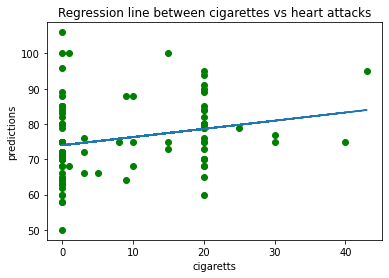

In [ ]:
print("Cigperday r Coefficient "+str(Correlation_Coeff(sample_one['heartRate'], sample_one['cigsPerDay'])))
t = T(Correlation_Coeff(sample_one['heartRate'], sample_one['cigsPerDay'].fillna(0)),len(sample_one))
print("T cigperday is: "+str(t))
P=(scipy.stats.norm.sf(t))*2
print("P value: "+str(P))
b1=(B_ONE(sample_one['cigsPerDay'],sample_one['heartRate']))
b0=(B_0(sample_one['cigsPerDay'],sample_one['heartRate']))
k=sample_one['cigsPerDay']
j=sample_one['heartRate']

mt.pyplot.plot(k, j, 'o', color='green')
mt.pyplot.xlabel('cigaretts')
mt.pyplot.ylabel('predictions')
mt.pyplot.plot(k, b1*k+b0)
mt.pyplot.title("Regression line between cigarettes vs heart attacks")

COEFFICENT of CORRELATION AND REGRESSION LINE FOR BMI AND HEARTRATE

In [ ]:
#filling the null values with the mean values in order to nullify the void

sample_one['BMI'] = sample_one['BMI'].fillna(25.97)

BMI r COEFFICENT 0.06076710720815743
T BMI is: 0.6026774350534181
P value: 0.5467232956614548


Text(0.5, 1.0, 'Regression line between BMI vs heart attacks')

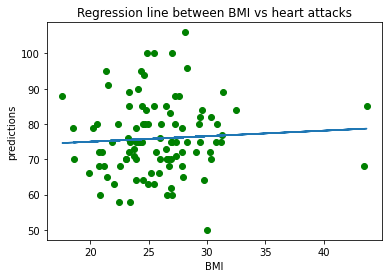

In [ ]:
print("BMI r COEFFICENT "+str(Correlation_Coeff(sample_one['heartRate'],sample_one['BMI'])))

t = T(Correlation_Coeff(sample_one['heartRate'], sample_one['BMI']),len(sample_one))
print("T BMI is: "+str(t))
P=(scipy.stats.norm.sf(t))*2
print("P value: "+str(P))

b1=(B_ONE(sample_one['BMI'],sample_one['heartRate']))
b0=(B_0(sample_one['BMI'],sample_one['heartRate']))

k=sample_one['BMI']
j=sample_one['heartRate']

mt.pyplot.plot(k, j, 'o', color='green')
mt.pyplot.xlabel('BMI')
mt.pyplot.ylabel('predictions')
mt.pyplot.plot(k, b1*k+b0)
mt.pyplot.title("Regression line between BMI vs heart attacks")

COEFFICENT of CORRELATION AND REGRESSION LINE FOR SYSBP AND HEARTRATE

In [ ]:
#filling the null values with the mean values in order to nullify the void

sample_one['sysBP']=sample_one['sysBP'].fillna(143)

sysBP r COEFFICENT 0.19765279254049417
T sysBP is: 1.9960405235412186
P value: 0.04592951205358933


Text(0.5, 1.0, 'Regression line between sysBP vs heart attacks')

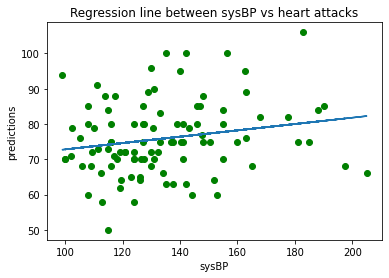

In [ ]:
print("sysBP r COEFFICENT "+str(Correlation_Coeff(sample_one['heartRate'],sample_one['sysBP'])))

t = T(Correlation_Coeff(sample_one['heartRate'], sample_one['sysBP']),len(sample_one))
print("T sysBP is: "+str(t))
P=(scipy.stats.norm.sf(t))*2
print("P value: "+str(P))

b1=(B_ONE(sample_one['sysBP'],sample_one['heartRate']))
b0=(B_0(sample_one['sysBP'],sample_one['heartRate']))

k=sample_one['sysBP']
j=sample_one['heartRate']

mt.pyplot.plot(k, j, 'o', color='green')
mt.pyplot.xlabel('sysBP')
mt.pyplot.ylabel('predictions')
mt.pyplot.plot(k, b1*k+b0)
mt.pyplot.title("Regression line between sysBP vs heart attacks")

COEFFICENT of CORRELATION AND REGRESSION LINE FOR DIABP AND HEARTRATE

In [ ]:
#filling the null values with the mean values in order to nullify the void

sample_one['diaBP']=sample_one['diaBP'].fillna(87)

diaBP r COEFFICENT 0.24500851524750483
T diaBP is: 2.501710369662078
P value: 0.012359498943056046


Text(0.5, 1.0, 'Regression line between diaBP vs heart attacks')

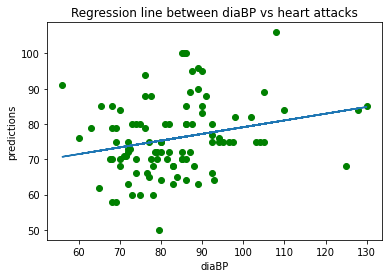

In [ ]:
print("diaBP r COEFFICENT "+str(Correlation_Coeff(sample_one['heartRate'],sample_one['diaBP'])))

t = T(Correlation_Coeff(sample_one['heartRate'], sample_one['diaBP']),len(sample_one))
print("T diaBP is: "+str(t))
P=(scipy.stats.norm.sf(t))*2
print("P value: "+str(P))

b1=(B_ONE(sample_one['diaBP'],sample_one['heartRate']))
b0=(B_0(sample_one['diaBP'],sample_one['heartRate']))

k=sample_one['diaBP']
j=sample_one['heartRate']

mt.pyplot.plot(k, j, 'o', color='green')
mt.pyplot.xlabel('diaBP')
mt.pyplot.ylabel('predictions')
mt.pyplot.plot(k, b1*k+b0)
mt.pyplot.title("Regression line between diaBP vs heart attacks")

COEFFICENT of CORRELATION AND REGRESSION LINE FOR TOTAL CHOLESTROL AND HEARTRATE

In [ ]:
#filling the null values with the mean values in order to nullify the void

sample_one['totChol'] = sample_one['totChol'].fillna(247)

totChol r COEFFICENT -0.11268358269214011
T totChol is: -1.1226608703651226
P value: 0.26158155259482463


Text(0.5, 1.0, 'Regression line between totChol vs heart attacks')

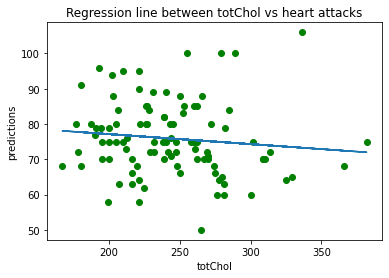

In [ ]:
print("totChol r COEFFICENT "+str(Correlation_Coeff(sample_one['heartRate'],sample_one['totChol'])))

t = T(Correlation_Coeff(sample_one['heartRate'], sample_one['totChol']),len(sample_one))
print("T totChol is: "+str(t))
P=(1-scipy.stats.norm.sf(t))*2
print("P value: "+str(P))

b1=(B_ONE(sample_one['totChol'],sample_one['heartRate']))
b0=(B_0(sample_one['totChol'],sample_one['heartRate']))

k=sample_one['totChol']
j=sample_one['heartRate']

mt.pyplot.plot(k, j, 'o', color='green')
mt.pyplot.xlabel('totChol')
mt.pyplot.ylabel('predictions')
mt.pyplot.plot(k, b1*k+b0)
mt.pyplot.title("Regression line between totChol vs heart attacks")

COEFFICENT of CORRELATION AND REGRESSION LINE FOR AGE AND HEARTRATE

In [ ]:
#filling the null values with the mean values in order to nullify the void

sample_one['age']= sample_one['age'].fillna(52)

age r COEFFICENT -0.1457335831408396
T age is: -1.4582574118939133
P value: 0.14476960428990182


Text(0.5, 1.0, 'Regression line between age vs heart attacks')

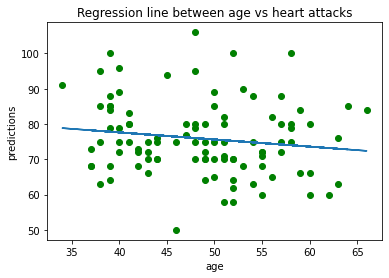

In [ ]:
print("age r COEFFICENT "+str(Correlation_Coeff(sample_one['heartRate'],sample_one['age'])))

t = T(Correlation_Coeff(sample_one['heartRate'], sample_one['age']),len(sample_one))
print("T age is: "+str(t))
P=(1-scipy.stats.norm.sf(t))*2
print("P value: "+str(P))

b1=(B_ONE(sample_one['age'],sample_one['heartRate']))
b0=(B_0(sample_one['age'],sample_one['heartRate']))

k=sample_one['age']
j=sample_one['heartRate']

mt.pyplot.plot(k, j, 'o', color='green')
mt.pyplot.xlabel('age')
mt.pyplot.ylabel('predictions')
mt.pyplot.plot(k, b1*k+b0)
mt.pyplot.title("Regression line between age vs heart attacks")

QUESTION NUMBER 4 LINEAR REGRESSION LINE EQUATION

HEART RATE

In [ ]:
def RESIDUAL(B0,B1,independent_values,Observed_values): #finding residuals i.e difference between the actual and predicted values
  residuals=[]
  for i in range(len(independent_values)):
    residuals.append((Observed_values[i]-(B0+B1*independent_values[i])))
  return residuals



In [ ]:
def predictions(B0,B1,independent_values): # finding the predicted values
  pred=[]
  for i in range(len(independent_values)):
    pred.append(B0+B1*independent_values[i])
  return pred

B0 AND B1

In [ ]:
print("B1: "+str(B_ONE(sample_one['age'],sample_one['heartRate'])))
print("B0: "+str(B_0(sample_one['age'],sample_one['heartRate'])))
print()
print("         USING AGE AS INDEPENDENT VARIABLE")
b1 = B_ONE(sample_one['age'],sample_one['heartRate'])
b0 = B_0(sample_one['age'],sample_one['heartRate'])

# residual calculation

res=RESIDUAL(b0,b1,sample_one['age'],sample_one['heartRate'])

#creating a dataframe with predictions, residuals, and observed values

zipped = list(zip(sample_one['heartRate'], predictions(b0,b1,sample_one['age']), res))
df = pd.DataFrame(zipped, columns=['observed heartrate', 'prediction', 'residual'])
df.head(5)

B1: -0.20106161090961946
B0: 85.6695836740984

         USING AGE AS INDEPENDENT VARIABLE


,observed heartrate,prediction,residual
0,72.0,77.023934,-5.023934
1,68.0,75.013318,-7.013318
2,70.0,75.214380,-5.214380
3,80.0,73.605887,6.394113
4,63.0,78.029242,-15.029242


residuals and b1, b0 for NUMBER OF CIGARETTES





B1: 0.2320019779281203
B0: 73.985983682093

   USING Cigarettes per day AS INDEPENDENT VARIABLE


,observed heartrate,prediction,residual
0,72.0,73.985984,-1.985984
1,68.0,76.306003,-8.306003
2,70.0,78.626023,-8.626023
3,80.0,73.985984,6.014016
4,63.0,73.985984,-10.985984


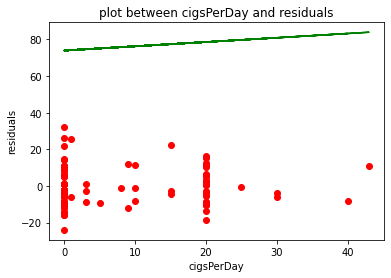

In [ ]:
print("B1: "+str(B_ONE(sample_one['cigsPerDay'],sample_one['heartRate'])))
print("B0: "+str(B_0(sample_one['cigsPerDay'],sample_one['heartRate'])))
print()
print("   USING Cigarettes per day AS INDEPENDENT VARIABLE")

b1 = B_ONE(sample_one['cigsPerDay'],sample_one['heartRate'])
b0 = B_0(sample_one['cigsPerDay'],sample_one['heartRate'])

# residual calculation

res=RESIDUAL(b0,b1,sample_one['cigsPerDay'],sample_one['heartRate'])

#creating a dataframe with predictions, residuals, and observed values

zipped = list(zip(sample_one['heartRate'], predictions(b0,b1,sample_one['cigsPerDay']), res))
df = pd.DataFrame(zipped, columns=['observed heartrate', 'prediction', 'residual'])


k=sample_one['cigsPerDay']
j=res

mt.pyplot.scatter(k, res, color='r', label='residual')
mt.pyplot.plot(k,b1*k+b0, color='g', label='regression line')
mt.pyplot.xlabel('cigsPerDay')
mt.pyplot.ylabel('residuals')

mt.pyplot.title("plot between cigsPerDay and residuals")
df.head(5)

residuals and b1, b0 for SYSBP

B1: 0.08984662766215311
B0: 63.82910557358973

         USING sysBP AS INDEPENDENT VARIABLE


,observed heartrate,prediction,residual
0,72.0,74.970087,-2.970087
1,68.0,74.251314,-6.251314
2,70.0,76.497480,-6.497480
3,80.0,77.755333,2.244667
4,63.0,76.587327,-13.587327


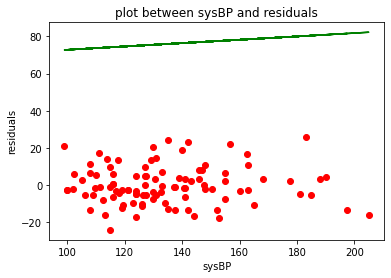

In [ ]:
print("B1: "+str(B_ONE(sample_one['sysBP'],sample_one['heartRate'])))
print("B0: "+str(B_0(sample_one['sysBP'],sample_one['heartRate'])))
print()
print("         USING sysBP AS INDEPENDENT VARIABLE")

b1 = B_ONE(sample_one['sysBP'],sample_one['heartRate'])
b0 = B_0(sample_one['sysBP'],sample_one['heartRate'])

#calculation of residual values

res=RESIDUAL(b0,b1,sample_one['sysBP'],sample_one['heartRate'])

#creating a dataframe with predictions, residuals, and observed values

zipped = list(zip(sample_one['heartRate'], predictions(b0,b1,sample_one['sysBP']), res))
df = pd.DataFrame(zipped, columns=['observed heartrate', 'prediction', 'residual'])

k=sample_one['sysBP']
j=res

mt.pyplot.scatter(k, res, color='r', label='residual')
mt.pyplot.plot(k,b1*k+b0, color='g', label='regression line')
mt.pyplot.xlabel('sysBP')
mt.pyplot.ylabel('residuals')

mt.pyplot.title("plot between sysBP and residuals")
df.head(5)

residuals and b1, b0 for DIABP

B1: 0.19079644887003605
B0: 60.032413329723454

         USING diaBP AS INDEPENDENT VARIABLE


,observed heartrate,prediction,residual
0,72.0,75.105333,-3.105333
1,68.0,75.868519,-7.868519
2,70.0,75.582324,-5.582324
3,80.0,77.681085,2.318915
4,63.0,73.769758,-10.769758


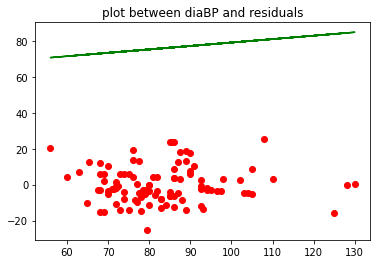

In [ ]:
print("B1: "+str(B_ONE(sample_one['diaBP'],sample_one['heartRate'])))
print("B0: "+str(B_0(sample_one['diaBP'],sample_one['heartRate'])))
print()
print("         USING diaBP AS INDEPENDENT VARIABLE")

b1 = B_ONE(sample_one['diaBP'],sample_one['heartRate'])
b0 = B_0(sample_one['diaBP'],sample_one['heartRate'])

#calculation of residuals

res=RESIDUAL(b0,b1,sample_one['diaBP'],sample_one['heartRate'])

#creating a dataframe with predictions, residuals, and observed values

zipped = list(zip(sample_one['heartRate'], predictions(b0,b1,sample_one['diaBP']), res))
df = pd.DataFrame(zipped, columns=['observed heartrate', 'prediction', 'residual'])


k=sample_one['diaBP']
j=res

# mt.pyplot.plot(k, j, 'o', color='green')
# mt.pyplot.xlabel('diaBP')
# mt.pyplot.ylabel('residuals')
# mt.pyplot.plot(j, b1*k+b0)

mt.pyplot.scatter(k, res, color='r', label='residual')
mt.pyplot.plot(k,b1*k+b0, color='g', label='regression line')


mt.pyplot.title("plot between diaBP and residuals")

df.head(5)

residuals and b1, b0 for TOTAL CHOLESTRAL

B1: -0.028255861357166456
B0: 82.78793132303646

     USING total cholestrol AS INDEPENDENT VARIABLE


,observed heartrate,prediction,residual
0,72.0,76.317339,-4.317339
1,68.0,72.446286,-4.446286
2,70.0,77.136759,-7.136759
3,80.0,76.402107,3.597893
4,63.0,76.684665,-13.684665


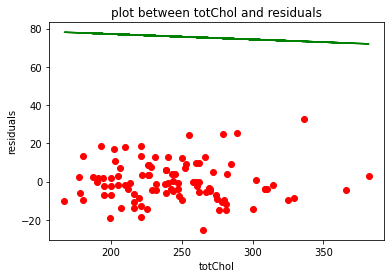

In [ ]:
print("B1: "+str(B_ONE(sample_one['totChol'].fillna(247),sample_one['heartRate'])))
print("B0: "+str(B_0(sample_one['totChol'].fillna(247),sample_one['heartRate'])))
print()
print("     USING total cholestrol AS INDEPENDENT VARIABLE")

b1 = B_ONE(sample_one['totChol'],sample_one['heartRate'])
b0 = B_0(sample_one['totChol'],sample_one['heartRate'])

#calculation of residuals

res=RESIDUAL(b0,b1,sample_one['totChol'],sample_one['heartRate'])

#creating a dataframe with predictions, residuals, and observed values

zipped = list(zip(sample_one['heartRate'], predictions(b0,b1,sample_one['totChol']), res))
df = pd.DataFrame(zipped, columns=['observed heartrate', 'prediction', 'residual'])

k=sample_one['totChol']
j=res

mt.pyplot.scatter(k, res, color='r', label='residual')
mt.pyplot.plot(k,b1*k+b0, color='g', label='regression line')
mt.pyplot.xlabel('totChol')
mt.pyplot.ylabel('residuals')

mt.pyplot.title("plot between totChol and residuals")

df.head(5)


residuals and b1, b0 for BMI

B1: 0.15644309075548088
B0: 71.86409678899929

         USING BMI AS INDEPENDENT VARIABLE


,observed heartrate,prediction,residual
0,72.0,76.601194,-4.601194
1,68.0,76.224166,-8.224166
2,70.0,76.019225,-6.019225
3,80.0,76.690366,3.309634
4,63.0,75.307409,-12.307409


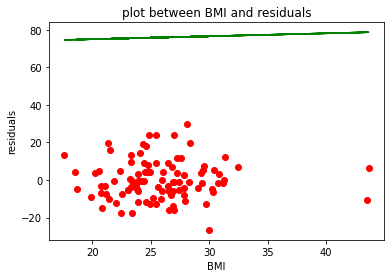

In [ ]:
print("B1: "+str(B_ONE(sample_one['BMI'].fillna(25),sample_one['heartRate'])))
print("B0: "+str(B_0(sample_one['BMI'].fillna(25),sample_one['heartRate'])))
print()
print("         USING BMI AS INDEPENDENT VARIABLE")
b1 = B_ONE(sample_one['BMI'],sample_one['heartRate'])
b0 = B_0(sample_one['BMI'],sample_one['heartRate'])
#calculation of residuals
res=RESIDUAL(b0,b1,sample_one['BMI'],sample_one['heartRate'])
#creating a dataframe with predictions, residuals, and observed values
zipped = list(zip(sample_one['heartRate'], predictions(b0,b1,sample_one['BMI']), res))
df = pd.DataFrame(zipped, columns=['observed heartrate', 'prediction', 'residual'])
k=sample_one['BMI']
j=res
mt.pyplot.scatter(k, res, color='r', label='residual')
mt.pyplot.plot(k,b1*k+b0, color='g', label='regression line')
mt.pyplot.xlabel('BMI')
mt.pyplot.ylabel('residuals')
mt.pyplot.title("plot between BMI and residuals")
df.head(5)

residuals and b1, b0 for AGE

B1: -0.20106161090961946
B0: 85.6695836740984

         USING AGE AS INDEPENDENT VARIABLE


,observed heartrate,prediction,residual
0,72.0,77.023934,-5.023934
1,68.0,75.013318,-7.013318
2,70.0,75.214380,-5.214380
3,80.0,73.605887,6.394113
4,63.0,78.029242,-15.029242


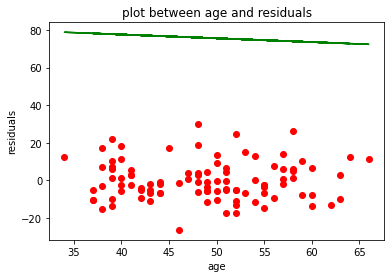

In [ ]:
print("B1: "+str(B_ONE(sample_one['age'].fillna(25),sample_one['heartRate'])))
print("B0: "+str(B_0(sample_one['age'].fillna(25),sample_one['heartRate'])))
print()
print("         USING AGE AS INDEPENDENT VARIABLE")
b1 = B_ONE(sample_one['age'],sample_one['heartRate'])
b0 = B_0(sample_one['age'],sample_one['heartRate'])

#calculation of residuals

res=RESIDUAL(b0,b1,sample_one['age'],sample_one['heartRate'])

#creating a dataframe with predictions, residuals, and observed values

zipped = list(zip(sample_one['heartRate'], predictions(b0,b1,sample_one['age']), res))
df = pd.DataFrame(zipped, columns=['observed heartrate', 'prediction', 'residual'])

k=sample_one['age']
j=res
mt.pyplot.scatter(k, res, color='r', label='residual')
mt.pyplot.plot(k,b1*k+b0, color='g', label='regression line')
mt.pyplot.xlabel('age')
mt.pyplot.ylabel('residuals')

mt.pyplot.title("plot between age and residuals")

df.head(5)

HEATMAP FOR ALL THE VARIABLES

Text(0.5, 1.0, 'Correlation Heatmap')

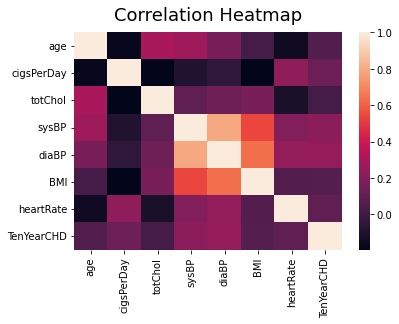

In [ ]:
sns.heatmap(sample_one[[ 'age', 'cigsPerDay',  'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'TenYearCHD']].corr()).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)